# Steane Code Restricting Connectivity

In [ ]:
import numpy as np
import random
from helpers.qec_helpers import *
from helpers.gates import *
from helpers.steane_helpers import *

## Contents
1. [Introduction](#introduction)
2. [Line Connectivity](#line)
    1. [Circuit Representation](#linecircuit)
    2. [Line Connectivity Implementation](#linecode)

## 1. Introduction <a id='introduction'></a>
### In this file we will restrict the connectivity of the 7-qubit Steane Code with 3 ancilla qubits to line connectivity and grid connectivity in order to demonstrate the gate operations needed to implement this circuit in a more realistic setting. Remember our Steane error correcting code looks like this:

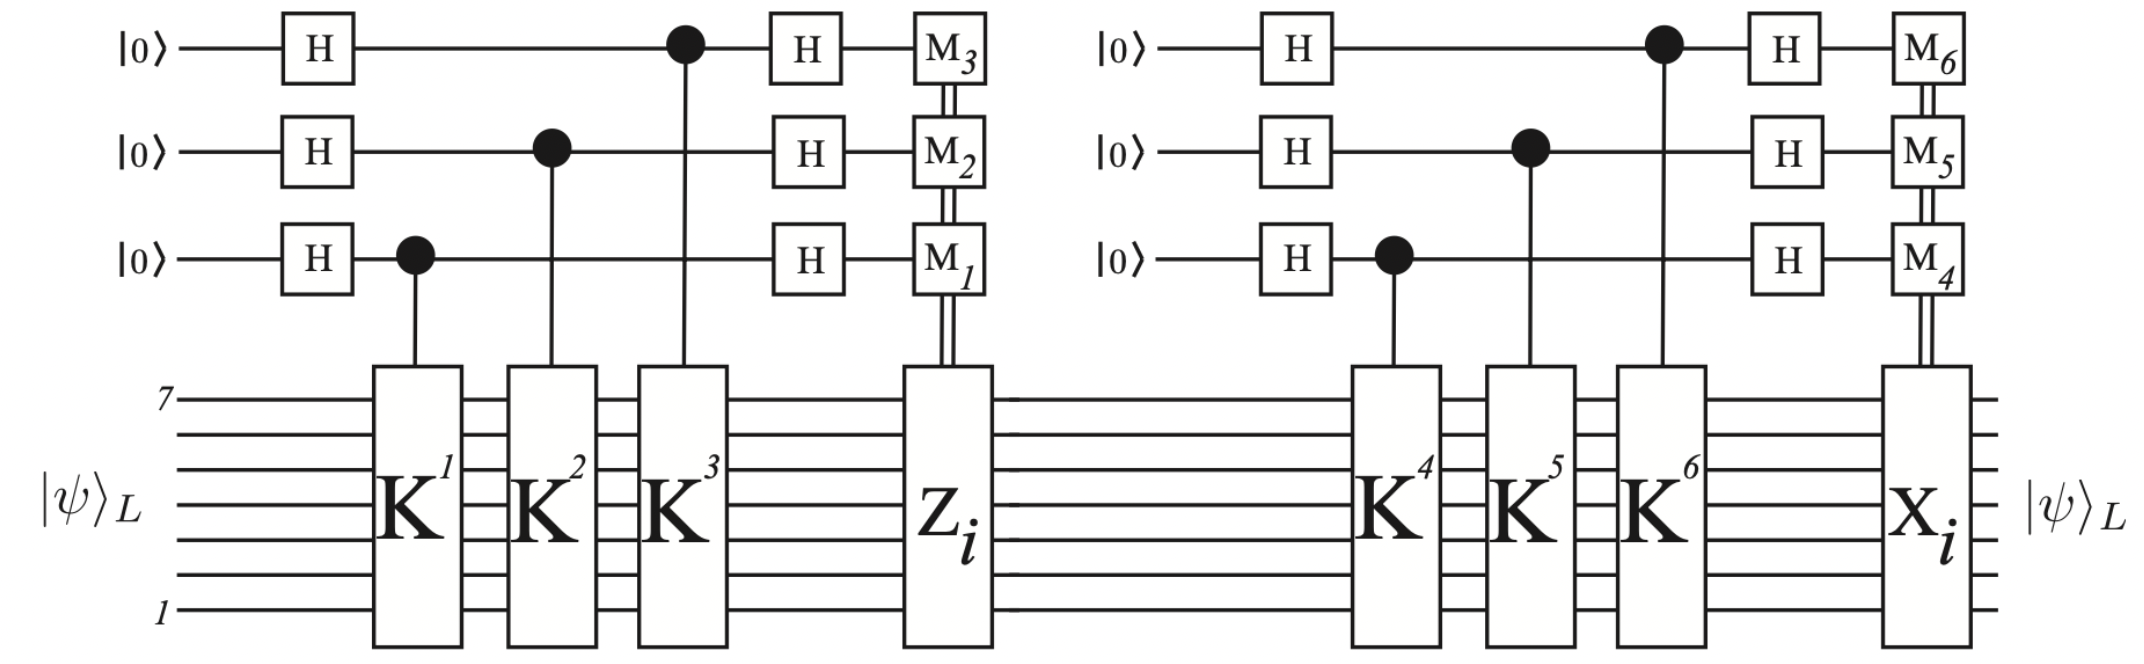

## 2. Line Connectivity <a id='line'></a>

### During our previous implementation of the Steane code we used the assumption of all-to-all connectivity, which means that all qubits are coupled to each other. This allows us to implement any two qubit gate from any one qubit to another using only one single gate. However, this is not the case in physical systems. In reality physical systems will be able to couple only a few qubits to each other. This will impact the probability of error due to the fact that we will now need to implement a much larger number of gates that before, and these gates always have some sort of probability for error.

#### Thus we will first implement the case where we have line connectivity. So we will need to break up each of our Stabilizer Gates into their individual components and then take the adjacent qubit CNOT representations of each.

#### Remember our stabilizers look like this:

$$ K^1 = IIIXXXX, \quad K^2 = XIXIXIX, \quad K^3 = IXXIIXX, $$
$$K^4 = IIIZZZZ, \quad K^5 = ZIZIZIZ, \quad K^6 = IZZIIZZ $$

#### So we can split each of these into the following:
$$ K^1 = IIIXXXX = (IIIXIII)(IIIIXII)(IIIIIXI)(IIIIIIX) $$
$$ K^2 = XIXIXIX = (XIIIIII)(IIXIIII)(IIIIXII)(IIIIIIX) $$
$$ K^3 = IXXIIXX = (IXIIIII)(IIXIIII)(IIIIIXI)(IIIIIIX) $$
$$ K^4 = IIIZZZZ = (IIIZIII)(IIIIZII)(IIIIIZI)(IIIIIIZ) $$
$$ K^5 = ZIZIZIZ = (ZIIIIII)(IIZIIII)(IIIIZII)(IIIIIIZ) $$
$$ K^6 = IZZIIZZ = (IZIIIII)(IIZIIII)(IIIIIZI)(IIIIIIZ) $$

#### Above things inside the parenthases are operated through kronecker products, but the parenthases are operated through a dot product. 

#### And when we use each ancilla as a control, we are just applying a CNOT gate for each term in the operators $K_1, K_2, K_3$ and a Control-Z gate for each term in the operators $K_4, K_5, K_6$.

### A. Circuit Representation <a id='linecircuit'></a>
#### In our case the circuit representation would look like this. And now we can split each of the CNOT and Control-Z gates into their adjacent qubit gate operations.

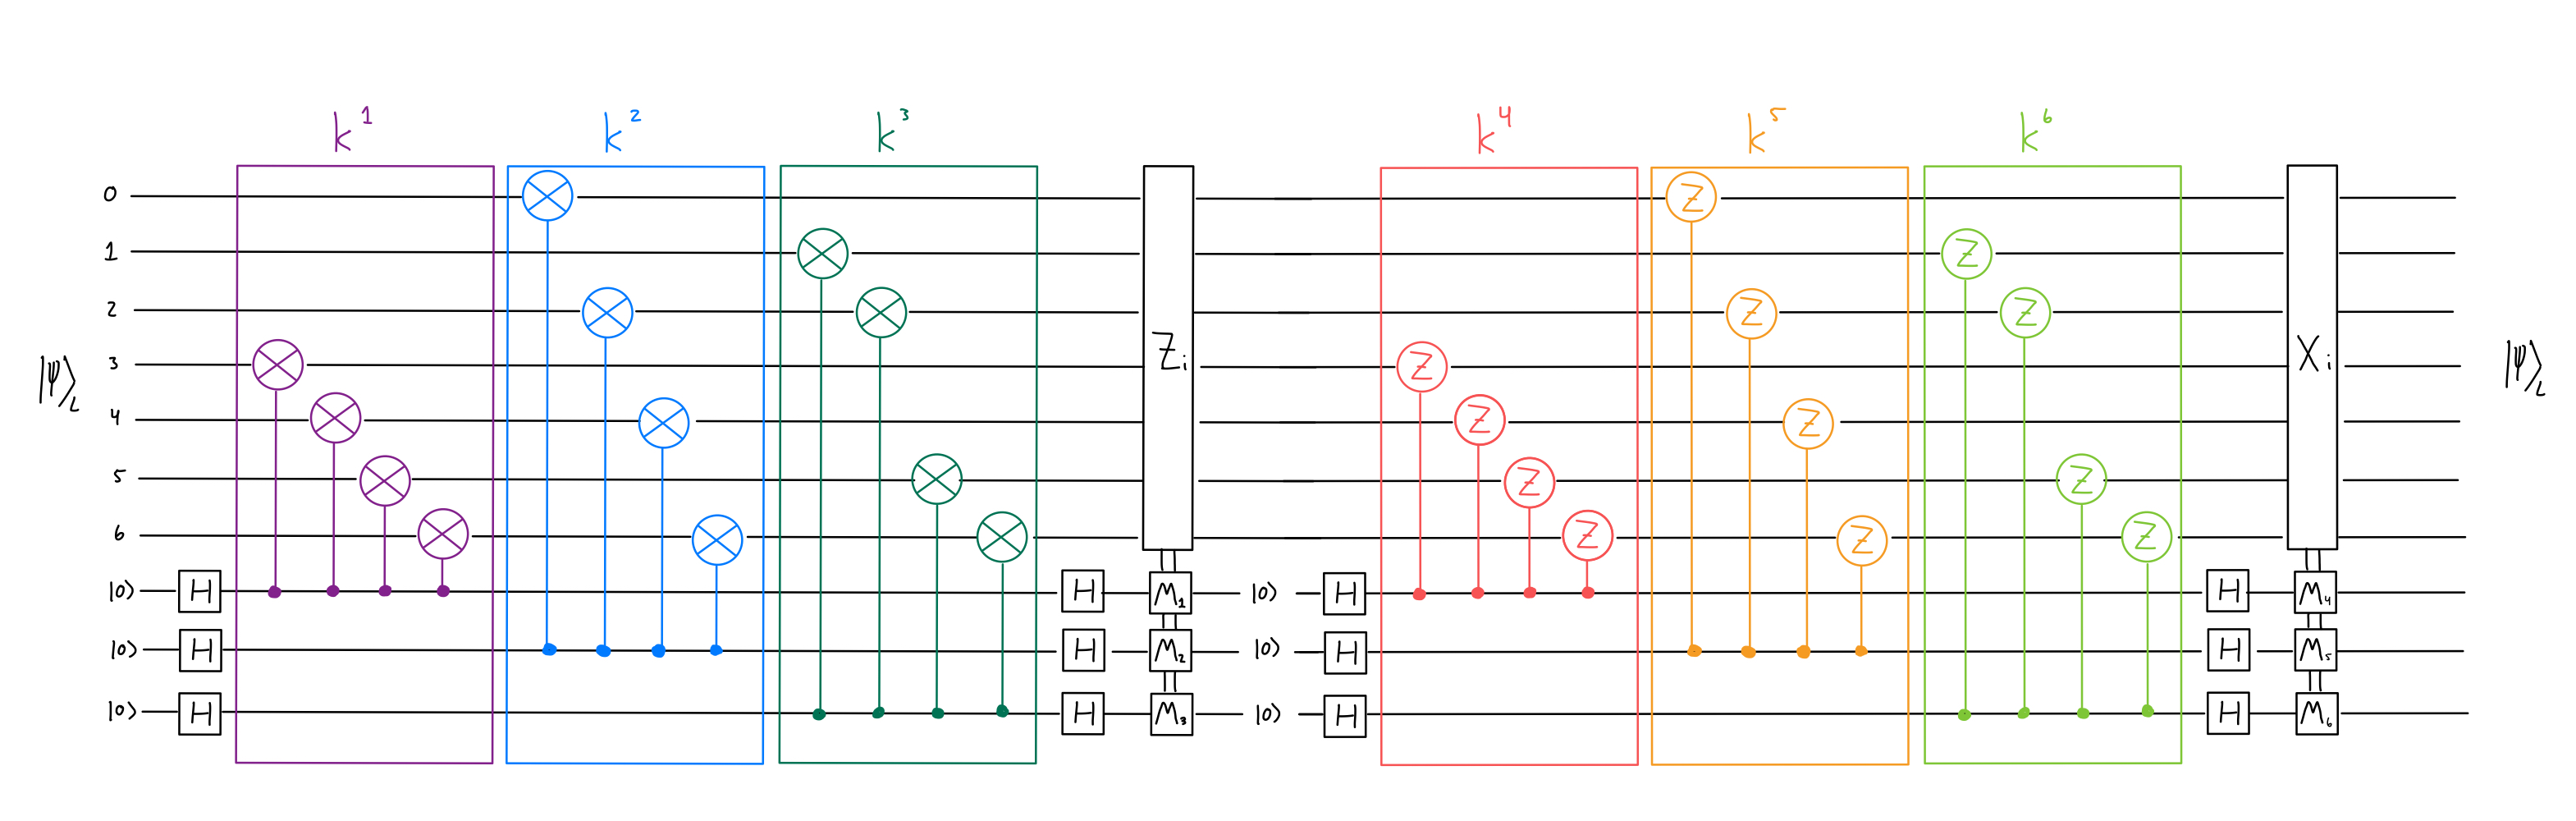

### B. Line Connectivity Implementation <a id='linecode'></a>

#### Set the initial states of your physical qubits

In [ ]:
# initial_state = np.kron(zero, np.kron(zero, np.kron(zero, np.kron(zero, np.kron(zero, np.kron(zero, zero))))))

initial_state = np.kron(one, np.kron(one, np.kron(one, np.kron(one, np.kron(one, np.kron(one, one))))))

# initial_state = 1/np.sqrt(2) * np.kron(np.array([[1,1]]), np.kron(np.array([[1,1]]), np.kron(
#     np.array([[1,1]]), np.kron(np.array([[1,1]]), np.kron(np.array([[1,1]]), np.kron(
#         np.array([[1,1]]), np.array([[1,1]])))))))

ancilla_syndrome = np.kron(zero, np.kron(zero, zero))
full_system = np.kron(initial_state, ancilla_syndrome)[0]

# print_state_info(full_system[0], 10)

#### Initialize a logical state using CNOT operations and line connectivity
In this case we can use our non-adj CNOT calculations since they implement line connectivity as shown in 02b. 3 qubit Restricting Connectivity, but this time a new function is made since the indices of the control and target qubit in the CNOT are actually flipped in this case.


In [ ]:
# Run the initialization function for the steane 7 qubit code
initialized_logical_state = initialize_steane_line_conn(initial_state)

# Format the state and normalize it correctly
logical_vector_state = format_state(np.sqrt(8) * initialized_logical_state)

# Display the current state (remove ancillas)
print('Initialized logical state: (by amplitude) ')
print_state_info(logical_vector_state, 7)

#### Now we apply an error and correct for it.

In [ ]:
# Apply our two errors
error_state = phase_flip_error(bit_flip_error(logical_vector_state, 10)[0], 10)[0]
# error_state = phase_flip_error(logical_vector_state, 10)[0]

# Display the current state (remove ancillas)
print('Errored logical state: ')
print_state_info(error_state, 7)

#### Remember that the correction circuit looks the same as the initialization in this case. So we can just run the same function as when we initialized it using line connectivity.

In [ ]:
# First apply our phase correction
phase_corrected_state = steane_line_conn_phase_correction(error_state)

# Display the current state (remove ancillas)
print('Phase corrected logical state: ')
print_state_info(phase_corrected_state, 7)

In [ ]:
# Reset the ancillas
phase_corrected_state = ancilla_reset(phase_corrected_state)

In [ ]:
# Next apply our bit correction
bit_corrected_state = steane_line_conn_bit_correction(phase_corrected_state)

# Display the current state (remove ancillas)
print('Bit corrected logical state: ')
print_state_info(bit_corrected_state, 7)